In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential

In [ ]:
kaggle = json.load(open("kaggle.json"))

In [ ]:
os.environ["KAGGLE_USERNAME"] = kaggle["username"]
os.environ["KAGGLE_KEY"] = kaggle["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:20<00:00, 106MB/s] 
100% 2.04G/2.04G [00:20<00:00, 108MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Grape___healthy']
38
['Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Grape___healthy']
38
['Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Grape___healthy']


In [ ]:
print(os.listdir("plantvillage dataset/color/Apple___healthy")[:5])
print(len(os.listdir("plantvillage dataset/color/Apple___healthy")[:5]))

['af2972a9-c62d-44bf-a5df-45c0bdf70572___RS_HL 5835.JPG', '8cf44f32-5736-4681-be02-f86e4454e00a___RS_HL 5904.JPG', 'eb1b7162-9f7a-4bb7-b3fc-5dcaef541b55___RS_HL 6218.JPG', '62acb368-c1b6-496c-910d-64cd4b8c5941___RS_HL 7964.JPG', '8f4c3d68-2d5a-40c5-bca1-911002ff3324___RS_HL 7299.JPG']
5


In [ ]:
base_dir = "plantvillage dataset/color"

(256, 256, 3)


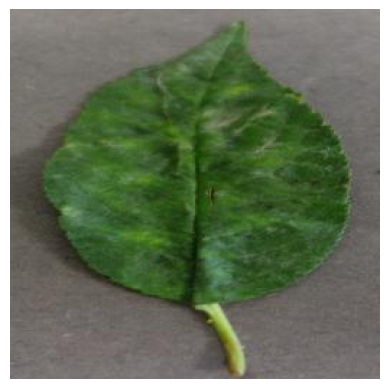

In [ ]:
image_path = "/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/00f8611c-0f2c-4f24-8241-d1748c8bb48f___FREC_Pwd.M 0479.JPG"
img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_size = 224
batch_size = 32

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "training",
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "validation",
    class_mode = "categorical"
)

Found 10849 images belonging to 38 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(train_generator.num_classes, activation = "softmax"))

In [ ]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 69ms/step - accuracy: 0.5796 - loss: 1.8135 - val_accuracy: 0.8486 - val_loss: 0.4752
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 69ms/step - accuracy: 0.9063 - loss: 0.2990 - val_accuracy: 0.8625 - val_loss: 0.4494
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 0.9609 - loss: 0.1218 - val_accuracy: 0.8278 - val_loss: 0.6739
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 67ms/step - accuracy: 0.9748 - loss: 0.0769 - val_accuracy: 0.8635 - val_loss: 0.6010
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - accuracy: 0.9821 - loss: 0.0531 - val_accuracy: 0.8630 - val_loss: 0.6898


In [ ]:
print("Model Evaluation")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100: .2f}%")

Model Evaluation
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8546 - loss: 0.7146
Validation Accuracy:  86.30%


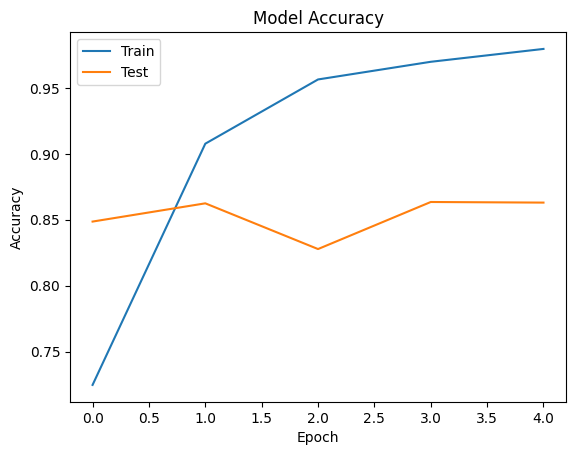

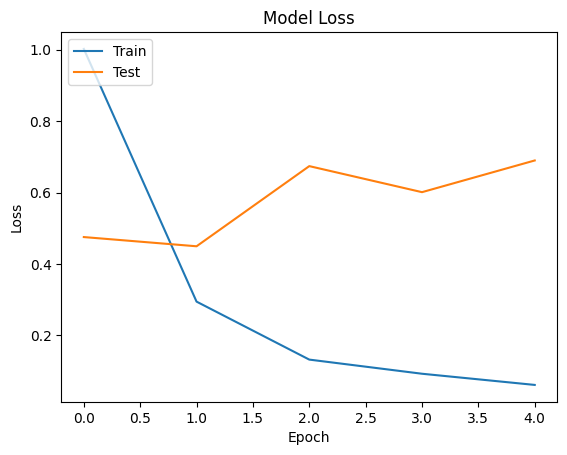

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [32]:
def load_and_preprocess_image(image_path, target_size = (224, 224)):
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array = img_array.astype('float32') / 255.0
  return img_array

def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [34]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [35]:
image_path = '/content/OIP.jpeg'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f"Predicted Class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
Predicted Class: Pepper,_bell___Bacterial_spot
